## Modelo 2: Regresión Logística

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### 1. Carga de datos

In [11]:
X = pd.read_csv("datos_entrada_normalizados.csv")
y = pd.read_csv("datos_salida.csv").values.ravel()

### 2. Entrenamiento del modelo con GridSearchCV

In [12]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X, y)
best_log_reg = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor precisión en validación cruzada: 0.8121739130434783
Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor precisión en validación cruzada: 0.8121739130434783


### 3. Evaluación del modelo

In [13]:
y_pred = best_log_reg.predict(X)
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión:\n", cm)

print("\nReporte de clasificación:\n", classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print("\nPrecisión total:", accuracy)

Matriz de confusión:
 [[9198    2]
 [2157  143]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      9200
           1       0.99      0.06      0.12      2300

    accuracy                           0.81     11500
   macro avg       0.90      0.53      0.51     11500
weighted avg       0.85      0.81      0.74     11500


Precisión total: 0.8122608695652174


### 4.Curvas de Aprendizaje

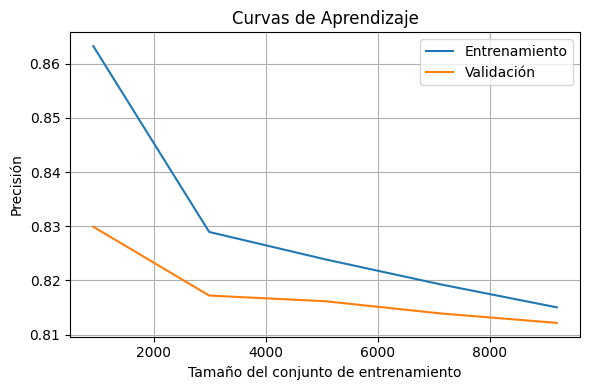

In [14]:
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Visualización de la Matriz de Confusión

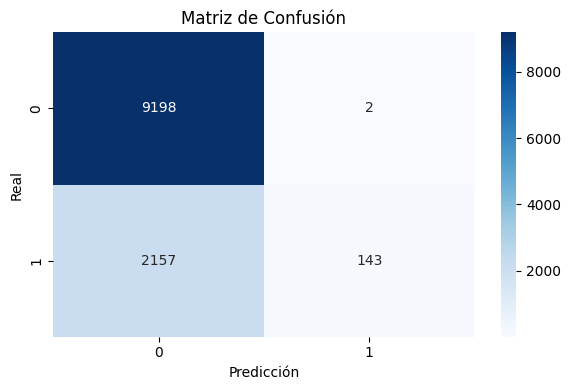

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

### 6.Curvas ROC

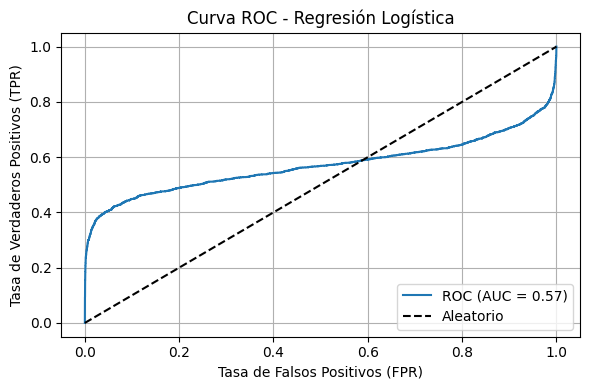

In [16]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva
y_proba = best_log_reg.predict_proba(X)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Exportar los datos relevantes del modelo

In [17]:
import json

resultados_modelo_2 = {
    "modelo": "Regresión Logística",
    "mejores_hiperparametros": grid_search.best_params_,
    "precision_validacion_cruzada": grid_search.best_score_,
    "precision_total": accuracy,
    "matriz_confusion": cm.tolist(),
    "reporte_clasificacion": classification_report(y, y_pred, output_dict=True)
}

#Exportar los datos
try:
    with open("resultados_modelos.json", "r") as fr:
        datos_existentes = json.load(fr)
except (FileNotFoundError, json.JSONDecodeError):
    datos_existentes = []

# Agregar los resultados al json.
datos_existentes.append(resultados_modelo_2)

# Guardar todos los resultados
with open("resultados_modelos.json", "w") as f:
    json.dump(datos_existentes, f, indent=4)